In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
import sklearn.svm as svm
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_score, cross_validate
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, accuracy_score, auc

### Data Modeling

#### Normalization : MinMaxScaler

In [13]:
d_final = pd.read_csv('C://workspaces//AI//Final_PJT//final pjt//d_final.csv', encoding = 'utf-8')

In [14]:
d_final.head()

,id,sex,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,...,tobacco,contact_other_covid,covid_res,icu,DEATH,d_ent,d_sym,d_last,diff_days,age_grp
0,167386,1,2,2,54,2,2,2,2,2,...,2,3,1,2,0,2020-04-06,2020-04-01,2020-06-29,89,3.0
1,0b5948,2,2,1,30,2,2,2,2,2,...,2,3,1,2,0,2020-04-17,2020-04-10,2020-06-29,80,2.0
2,0d01b5,1,2,2,60,2,1,2,2,2,...,2,3,1,2,1,2020-04-13,2020-04-13,2020-04-22,9,4.0
3,1beec8,2,2,1,47,2,1,2,2,2,...,2,3,1,1,1,2020-04-16,2020-04-16,2020-04-29,13,3.0
4,1.75E+56,2,2,2,63,2,2,2,2,2,...,2,3,1,2,0,2020-04-22,2020-04-13,2020-06-29,77,4.0


In [15]:
# 정규화할 변수만 d_normal0에 저장
d_normal0 = d_final.loc[:, ['sex', 'intubed', 'pneumonia', 'age_grp', 'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr',
                            'hypertension', 'other_disease', 'obesity', 'cardiovascular', 'renal_chronic', 
                            'tobacco', 'contact_other_covid', 'covid_res', 'icu']]

# y(종속변수)는 정규화 하지않고 따로 저장
d_y = d_final.loc[:, ['DEATH', 'diff_days']]

In [16]:
# 정규화
d_normal = MinMaxScaler(feature_range=(0,1)).fit_transform(d_normal0)
d_normal

array([[0. , 0.5, 0.5, ..., 1. , 0. , 0.5],
       [1. , 0.5, 0. , ..., 1. , 0. , 0.5],
       [0. , 0.5, 0.5, ..., 1. , 0. , 0.5],
       ...,
       [1. , 0. , 0. , ..., 0.5, 1. , 0. ],
       [0. , 0.5, 0. , ..., 1. , 1. , 0.5],
       [0. , 0.5, 0. , ..., 1. , 1. , 0.5]])

#### Train, Test set 분리

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(d_normal, d_y, shuffle = True, test_size=0.2, random_state = 1004)

In [18]:
print(X_train.shape[:],'\n', X_test.shape[:], '\n', Y_train.shape[:], '\n', Y_test.shape[:])  

(97116, 18) 
 (24279, 18) 
 (97116, 2) 
 (24279, 2)


### Support Vector Machine

#### SVM Hyper Parameter Tuning
- 선형/비선형 커널 중 어떤것이 나을지는 3-fold CV로 결정
- GridSerchCV로 파라미터 결정

##### 1) Linear, Non-linear kernel (3-fold CV)

In [28]:
# Linear kernel
Y_train1 = Y_train.loc[:, "DEATH"]
SVM =svm.SVC(kernel = 'linear') # 선형분리 커널 

In [35]:
# CV1 (linear)
scores = cross_val_score(SVM, X_train, Y_train1, cv = KFold(3, random_state=1004, shuffle=True))
scores 

C:\ProgramData\Anaconda3\envs\py37_tf2\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


array([0.74891882, 0.74413073, 0.74771407])

In [37]:
pd.DataFrame(cross_validate(SVM, X_train, Y_train1, cv = KFold(3, random_state=1004, shuffle=True)))
print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.7469212076279913


In [38]:
# Non-Linear Kernel
SVM =svm.SVC(kernel = 'rbf')

In [39]:
# CV2 (NonLinear)
scores = cross_val_score(SVM, X_train, Y_train1, cv = KFold(3, random_state=1004, shuffle=True))
scores 

array([0.76949215, 0.7710367 , 0.77650439])

In [41]:
pd.DataFrame(cross_validate(SVM, X_train, Y_train1, cv = KFold(3, random_state=1004, shuffle=True)))
print('교차검증 평균: ', scores.mean())0

교차검증 평균:  0.7723444128670868


##### 2) Hyperparameter Tuning (GridSerchCV) -- Non-Linear로 하기!

In [ ]:
svm_model = svm.SVC(kernel = 'linear', random_state=1004)
parameters = {'C' : [0.001, 0.01, 0.05, 0.1, 1, 10, 25, 50, 100]}

In [ ]:
grid_svm = GridSearchVB(svm_model, 
                       param_grid = parameters,
                       cv = KFold(5, random_state = 1004, shuffle=True))

In [ ]:
grid_svm.fit(X_train, Y_train1)

In [ ]:
result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

In [23]:
print('accuracy : %.3f' % accuracy_score(y_true = Y_test1, y_pred=Y_pred))
print('recall : %.3f' % recall_score(y_true = Y_test1, y_pred=Y_pred))
print('f1_score : %.3f' % f1_score(y_true = Y_test1, y_pred=Y_pred))

accuracy : 0.782
recall : 0.380
f1_score : 0.482


#### ROC curve 작성

In [24]:
f_value = xgb_best.fit(X_test,Y_test1).predict_proba(X_test) # 분류 확률

fpr, tpr, thresholds = roc_curve(Y_test1, f_value[:,1])
fpr, tpr, thresholds

[16:20:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_dept } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




(array([0.        , 0.        , 0.        , ..., 0.99973041, 0.9998652 ,
        1.        ]),
 array([0.00000000e+00, 1.23563573e-04, 1.97701718e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.9545631e+00, 9.5456308e-01, 8.9619648e-01, ..., 2.4312853e-03,
        2.1975175e-03, 1.9362422e-03], dtype=float32))

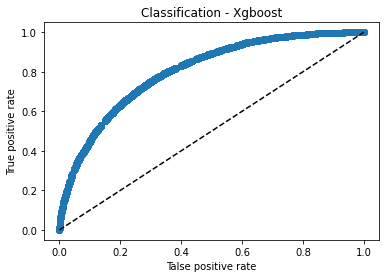

In [47]:
plt.plot(fpr, tpr, 'o-', label="Xgboost (AUC=%0.3f)")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Talse positive rate')
plt.ylabel('True positive rate')
plt.title('Classification - Xgboost')
plt.show()

In [26]:
print('AUC : %.3f' % auc(fpr, tpr))

AUC : 0.804


#### TPR, FPR export (나중에 그래프 그릴 때 쓰게)

In [30]:
d_tpr = pd.DataFrame({'tpr':tpr} )
d_fpr = pd.DataFrame({'fpr':fpr} )

In [32]:
clf_xgboost = pd.concat([d_tpr, d_fpr], axis = 1)
clf_xgboost

,tpr,fpr
0,0.000000,0.000000
1,0.000124,0.000000
2,0.001977,0.000000
3,0.002101,0.000045
4,0.002348,0.000045
...,...,...
4979,1.000000,0.999236
4980,1.000000,0.999416
4981,1.000000,0.999730
4982,1.000000,0.999865


In [48]:
clf_xgboost.to_csv('C://workspaces//AI//Final_PJT//final pjt//clf_xgboost.csv', encoding='utf-8', index=False, line_terminator='\n')

#### Feature importance plot

In [33]:
print("특성 중요도 : \n{}".format(xgb_best.feature_importances_))

특성 중요도 : 
[0.02155102 0.15632181 0.1218803  0.15943441 0.01196207 0.02105765
 0.01429915 0.01747117 0.01610252 0.01981214 0.01423952 0.02032563
 0.01464227 0.03051664 0.01506228 0.1069509  0.22060323 0.01776728]


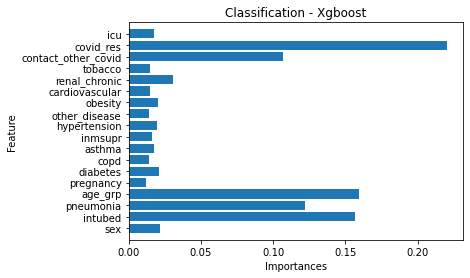

In [46]:
# 특성 중요도 시각화 하기


def plot_feature_importances_df(model):
    n_features = X_test.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), ['sex', 'intubed', 'pneumonia', 'age_grp', 'pregnancy', 'diabetes',
                                       'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease', 'obesity',
                                       'cardiovascular', 'renal_chronic', 'tobacco', 'contact_other_covid', 'covid_res', 'icu'])
    plt.xlabel("Importances")
    plt.ylabel("Feature")
    plt.title("Classification - Xgboost")
    plt.ylim(-1, n_features)
plt.show()

plot_feature_importances_df(xgb_best)